This notebook presents a simulation of 5000 ms of 400 descending commands and 800 motoneurons from soleus. The force is prduced by a Hill-type muscle model. 

In [5]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
%matplotlib notebook 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"


import numpy as np

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from NeuralTract import NeuralTract
from AfferentPool import AfferentPool
from SynapsesFactory import SynapsesFactory
from jointAnkleForceTask import jointAnkleForceTask
from numba import jit, prange
import scipy as sc
from scipy.signal import *


In [6]:
b,a = sc.signal.butter(2,50.0/(10000))
disturbance = np.transpose(sc.signal.filtfilt(b,a,sc.random.randn(1,int(20000*60))))

In [7]:
conf = Configuration('confImpedanceAnkle.rmto')
conf.simDuration_ms = 30000 # Here I change simulation duration without changing the Configuration file.
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

In [8]:
pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')
pools[1] = MotorUnitPool(conf, 'MG')
pools[2] = MotorUnitPool(conf, 'LG')
pools[3] = MotorUnitPool(conf, 'TA')
pools[4] = NeuralTract(conf, 'CMExt')
pools[5] = AfferentPool(conf,'Ia', 'SOL')
pools[6] = AfferentPool(conf,'Ia', 'MG')
pools[7] = AfferentPool(conf,'Ia', 'LG')
pools[8] = AfferentPool(conf,'Ia', 'TA')
ankle = jointAnkleForceTask(conf, pools)
Syn = SynapsesFactory(conf, pools)
del Syn

[ 4526.19985237]
Hill muscle of the SOL muscle with maximum force of 3586.0 N  built.
Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
[ 2891.9689842]
Hill muscle of the MG muscle with maximum force of 1306.0 N  built.
Muscle spindle from muscle MG built.
Motor Unit Pool MG built
[ 1253.28483894]
Hill muscle of the LG muscle with maximum force of 606.0 N  built.
Muscle spindle from muscle LG built.
Motor Unit Pool LG built
[ 1270.96011802]
Hill muscle of the TA muscle with maximum force of 674.0 N  built.
Muscle spindle from muscle TA built.
Motor Unit Pool TA built
Descending Command CMExt built
Afferent Pool Ia of muscle SOL built
Afferent Pool Ia of muscle MG built
Afferent Pool Ia of muscle LG built
Afferent Pool Ia of muscle TA built
Ankle joint for Force Task built
All the 739567 synapses were built
All the 0 synaptic noises were built


In [5]:
tic = time.time()
for i in xrange(0,len(t)-1): 
    if i % 20000 == 0:
        print str(i/20000.0) + ' neural seconds'
    ankle.atualizeAnkle(t[i], 0.4 * disturbance[i])
    #pools[4].atualizePool(t[i])
    for j in xrange(4):
        pools[j].atualizeMotorUnitPool(t[i])
    #pools[5].atualizeAfferentPool(t[i], pools[0].spindle.IaFR_Hz)
    #pools[6].atualizeAfferentPool(t[i], pools[1].spindle.IaFR_Hz)
    #pools[7].atualizeAfferentPool(t[i], pools[2].spindle.IaFR_Hz)
    #pools[8].atualizeAfferentPool(t[i], pools[3].spindle.IaFR_Hz)
    ankle.computeTorque(t[i])
toc = time.time() 
    
print str(toc - tic) + ' seconds'

0.0 neural seconds
1.0 neural seconds
2.0 neural seconds
3.0 neural seconds
4.0 neural seconds
5.0 neural seconds
6.0 neural seconds
7.0 neural seconds
8.0 neural seconds
9.0 neural seconds
10.0 neural seconds
11.0 neural seconds
12.0 neural seconds
13.0 neural seconds
14.0 neural seconds
15.0 neural seconds
16.0 neural seconds
17.0 neural seconds
18.0 neural seconds
19.0 neural seconds
20.0 neural seconds
21.0 neural seconds
22.0 neural seconds
23.0 neural seconds
24.0 neural seconds
25.0 neural seconds
26.0 neural seconds
27.0 neural seconds
28.0 neural seconds
29.0 neural seconds
64193.815757 seconds


In [6]:
print str(toc - tic) + ' seconds'
pools[0].listSpikes()
pools[1].listSpikes()
pools[2].listSpikes()
pools[3].listSpikes()
pools[4].listSpikes()
pools[5].listSpikes()
pools[6].listSpikes()
pools[7].listSpikes()
pools[8].listSpikes()

64193.815757 seconds


The spike times of the MNs along the 5000 ms of simulation are shown in Fig. \ref{fig:spikesMNHill}.

<IPython.core.display.Javascript object>


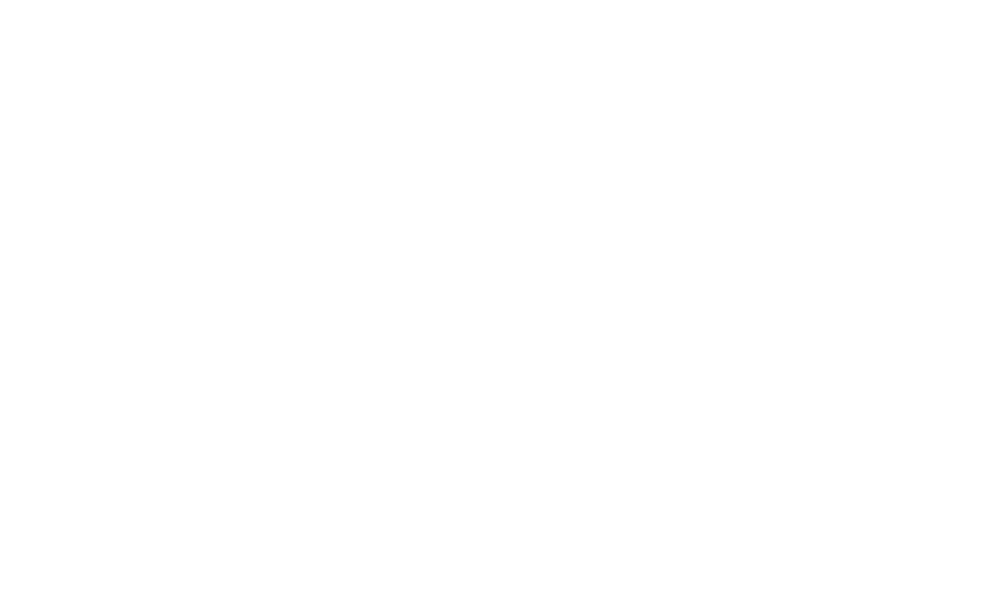

In [7]:
plt.figure()
plt.plot(pools[0].poolTerminalSpikes[:, 0],
         pools[0].poolTerminalSpikes[:, 1]+1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Motor Unit index')
plt.show()

<IPython.core.display.Javascript object>


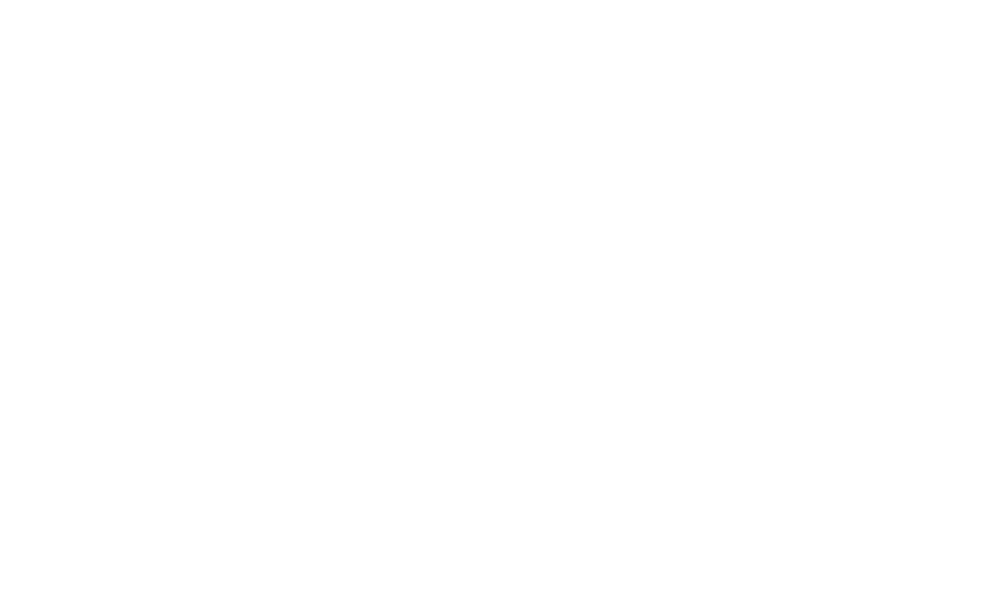

Text(0,0.5,u'Afferent index')

In [8]:
plt.figure()
plt.plot(pools[2].poolTerminalSpikes[:, 0],
         pools[2].poolTerminalSpikes[:, 1]+1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Afferent index')

The muscle force produced by the Hill-type model is shown in Fig.\ref{fig:forceHill}.

<IPython.core.display.Javascript object>


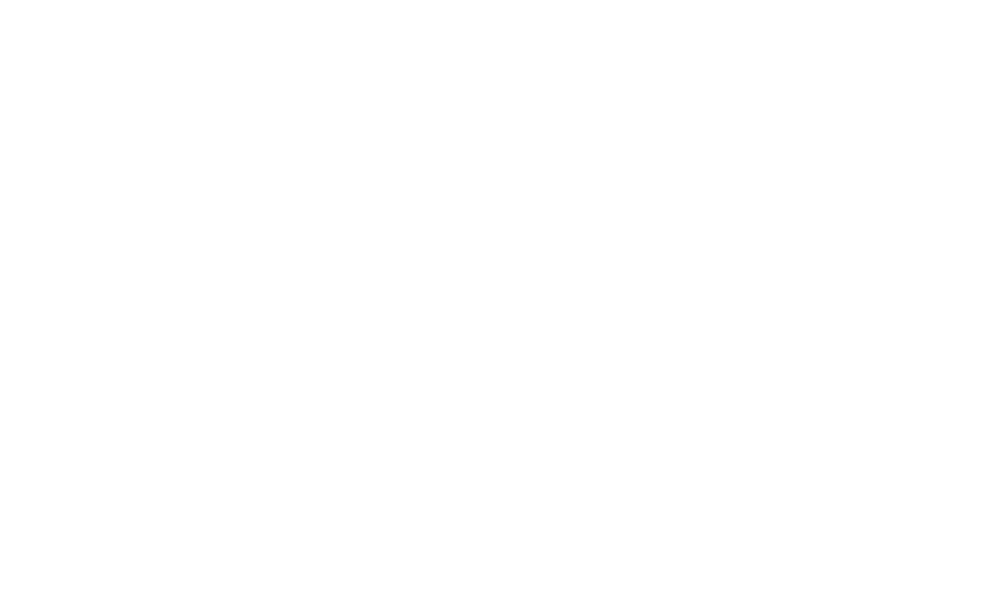

In [9]:
plt.figure()
plt.plot(t, pools[0].Muscle.force, '-')
plt.xlabel('t (ms)')
plt.ylabel('Muscle Force (N)')
plt.show()

The muscle length computed with the Hill-type model is shown in Fig.\ref{fig:lengthHill}.

<IPython.core.display.Javascript object>


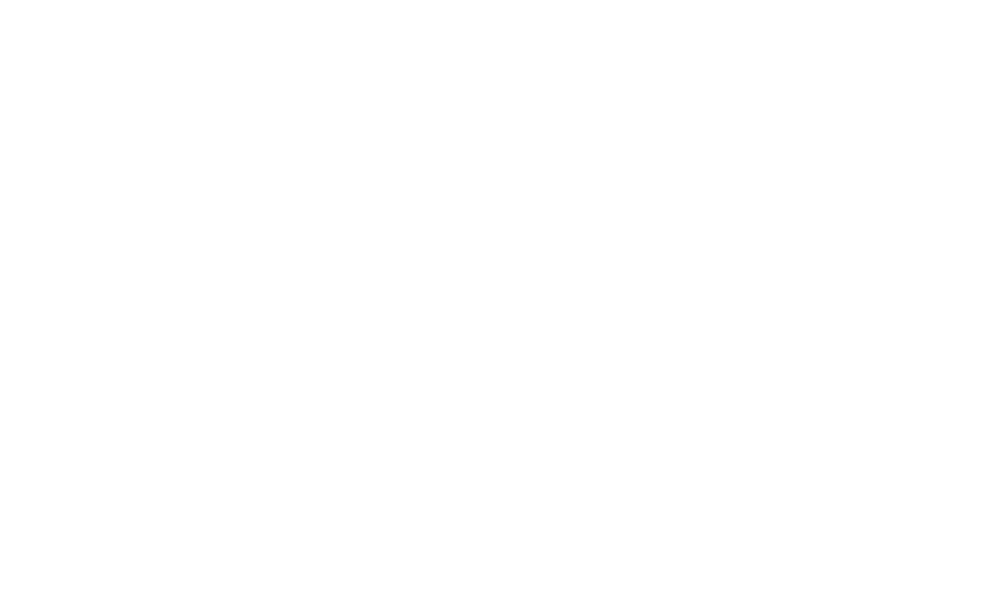

In [10]:
plt.figure()
plt.plot(t, pools[0].Muscle.length_m/pools[0].Muscle.optimalLength_m, '-')
plt.xlabel('t (ms)')
plt.ylabel('Muscle Length (m)')
plt.show()

The muscle velocity, computed by the Hill-type muscle model, is in Fig.\ref{fig:velocityHill}.

<IPython.core.display.Javascript object>


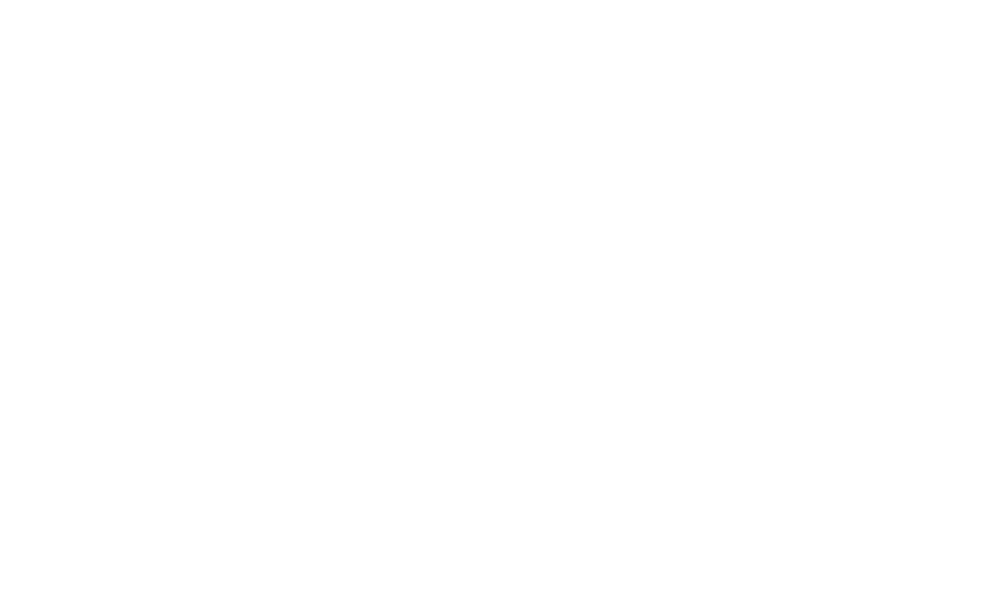

In [11]:
plt.figure()
plt.plot(t, pools[0].Muscle.velocity_m_ms/pools[0].Muscle.optimalLength_m, '-')
plt.xlabel('t (ms)')
plt.ylabel('Muscle Velocity (m/ms)')
plt.show()

The ankle joint angle is shown in Fig. \ref{fig:ankleAngleHill}.

<IPython.core.display.Javascript object>


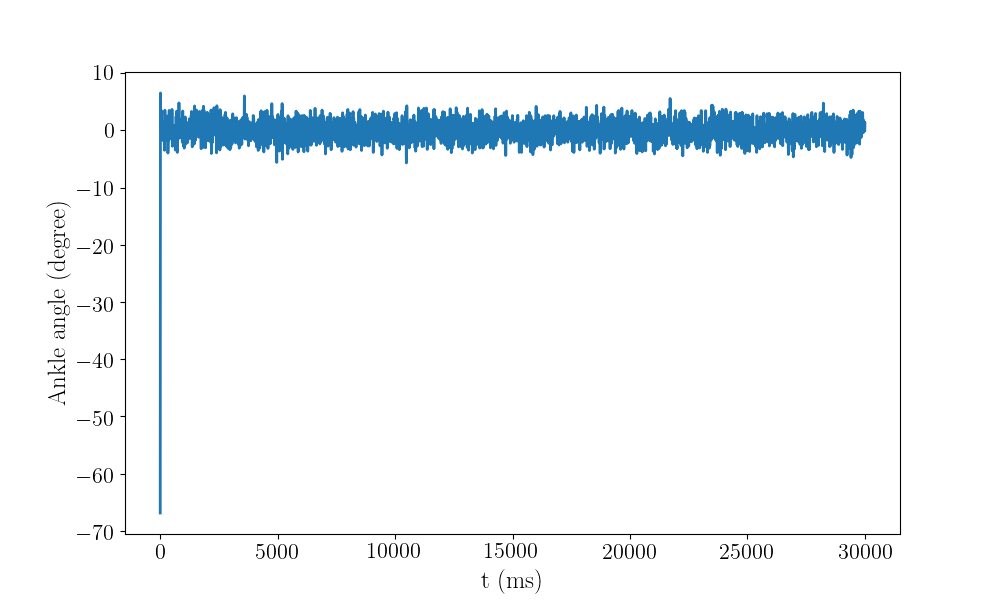

In [21]:
plt.figure()
plt.plot(t, ankle.ankleAngle_rad*180.0/np.pi, '-')
plt.xlabel('t (ms)')
plt.ylabel('Ankle angle (degree)')
plt.show()

<IPython.core.display.Javascript object>


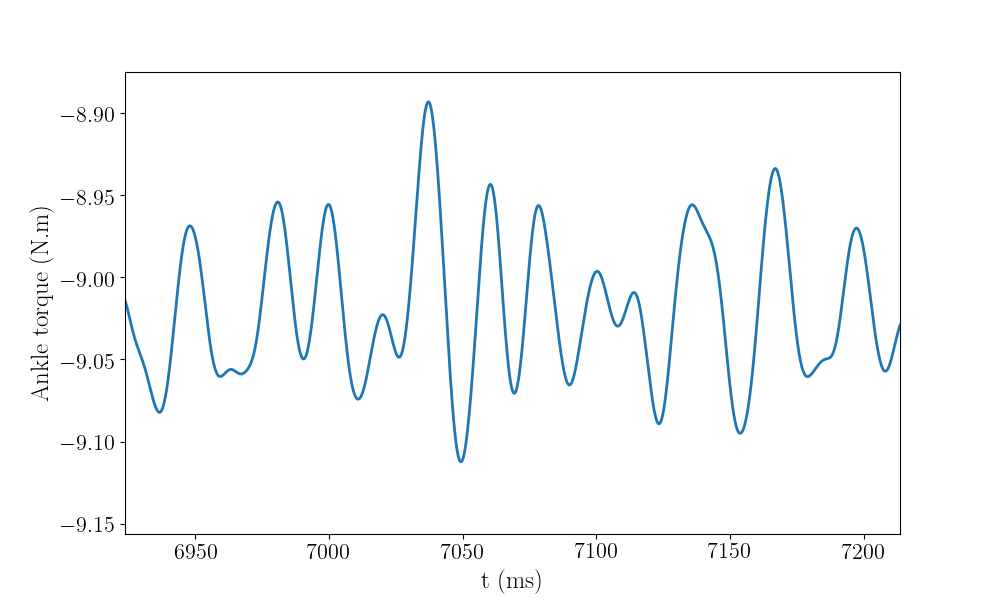

Text(0,0.5,u'Ankle torque (N.m)')

In [22]:
%matplotlib notebook
plt.figure()
plt.plot(t, ankle.ankleTorque_Nm, '-')
plt.xlabel('t (ms)')
plt.ylabel('Ankle torque (N.m)')

In [14]:
torque  = (-ankle.ankleTorque_Nm[40000:int(29.5*20000)])
angle = (ankle.ankleAngle_rad[40000:int(29.5*20000)])

In [15]:
window = 160000
f, Sta = sc.signal.csd(np.transpose((angle)),np.transpose((torque)),fs = 20000, nperseg=window)
f, St = sc.signal.welch(np.transpose((torque)),fs = 20000, nperseg=window)
f, Sa = sc.signal.welch(np.transpose((angle)),fs = 20000, nperseg=window)
Z= Sta/Sa

<IPython.core.display.Javascript object>


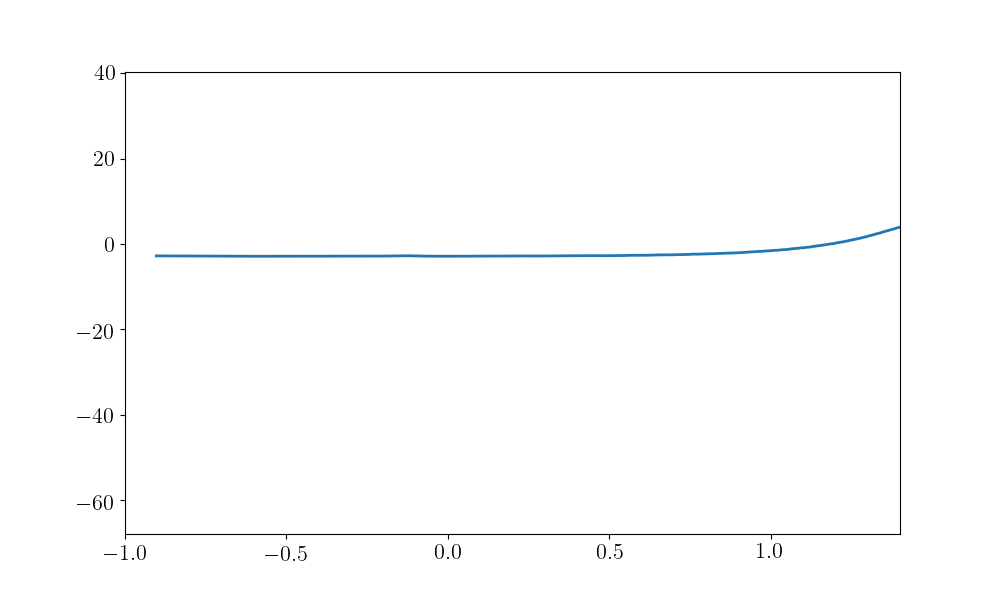

/opt/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [23]:
plt.figure()
plt.plot(np.log10(f),20*np.log10(np.transpose(np.abs(Z))))
plt.xlim((-1,1.4))
#plt.ylim((-20,70))
plt.show()

<IPython.core.display.Javascript object>


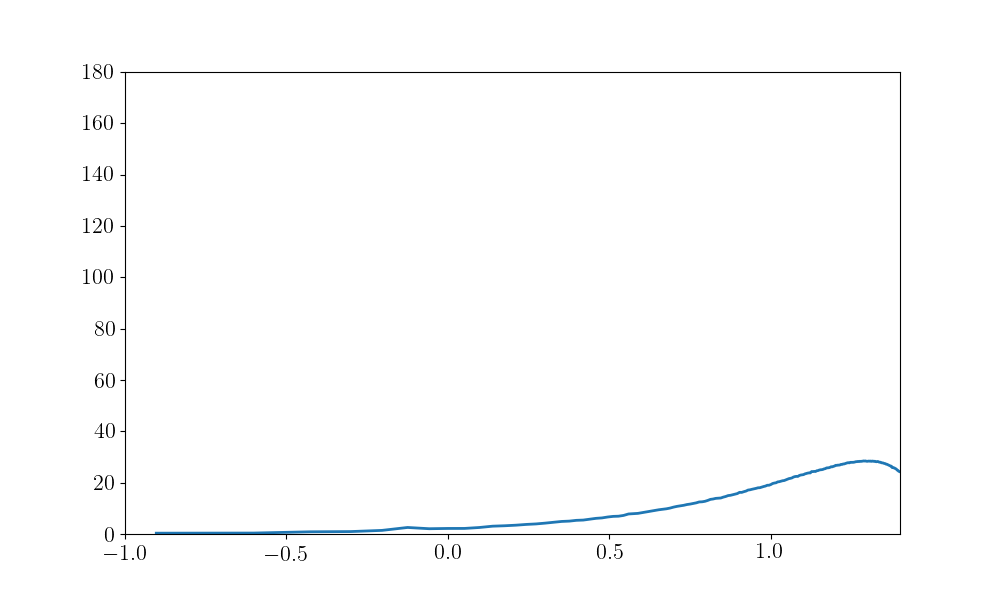

/opt/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [24]:
plt.figure()
plt.plot(np.log10(f),(np.transpose(np.angle(Z)))*180/np.pi)
plt.xlim((-1,1.4))
plt.ylim((-0,180))
plt.show()

In [18]:
torquePassive = torque
anglePassive = angle

<IPython.core.display.Javascript object>


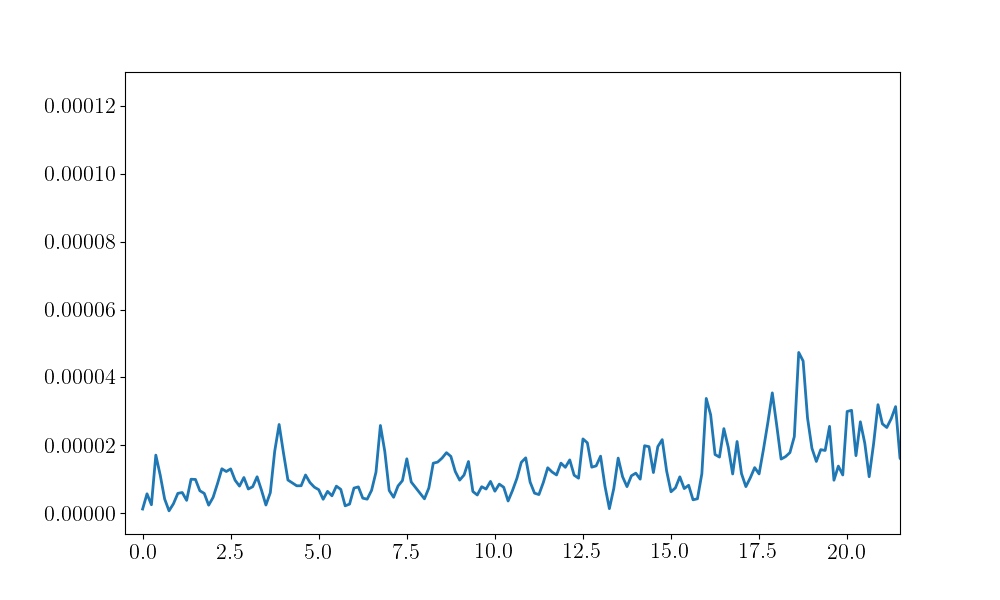

In [19]:
plt.figure()
plt.plot((f),(np.transpose(np.abs(St))))
plt.xlim((-0.5,21.5))
plt.show()

<IPython.core.display.Javascript object>


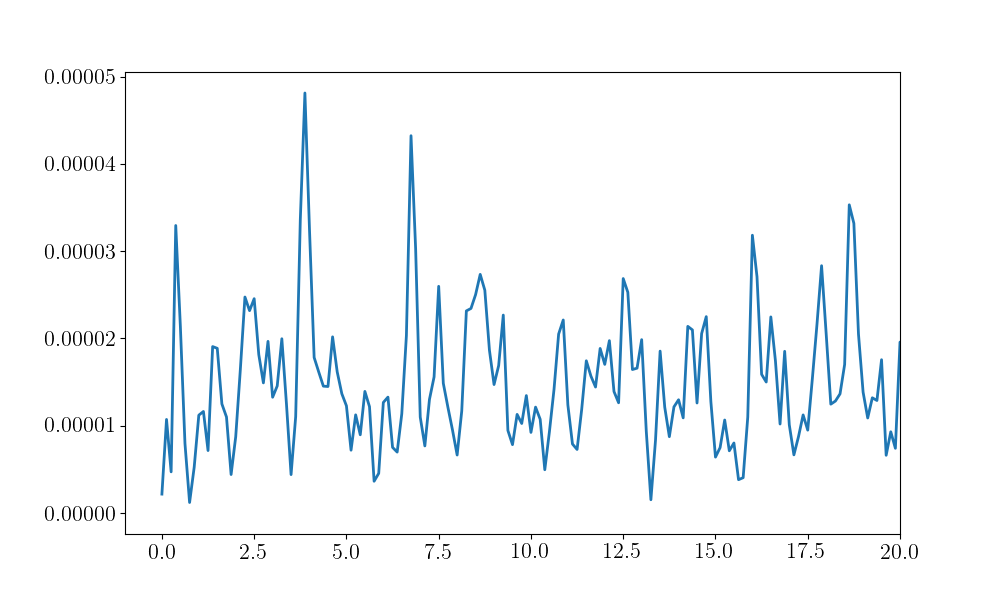

In [29]:
plt.figure()
plt.plot((f),(np.transpose(np.abs(Sa))))
plt.xlim((-1,20))
plt.show()

In [28]:
10**(27/20.0)/(np.pi)

7.126070708149346